## define

In [1]:
# run command 'conda install scikit-image' on project's v-env
# run command 'conda install pandas' on project's v-env

In [1]:
def encode_from_utf8(x):
    return list(map(float,bin(int(x.encode().hex(),16))[2:]))

In [2]:
def decode_from_bin(x):
    res = ""
    for i in x:
        res+=str(round(i))
        pass
    return bytearray.fromhex(hex(int(res, 2))[2:]).decode()

In [3]:
import os
import torch
import numpy as np
import pandas as pd
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader

class KoreanHandwritingDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.dataset = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.dataset.iloc[idx, 0]
        image = io.imread(img_name)
        label = self.dataset.iloc[idx, 1]
        label = np.array([label])
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample
    pass
csv_file = "./image-data/labels-map.csv"
root_dir = "./image-data/hangul-images"
Data_Korean = KoreanHandwritingDataset(csv_file, root_dir)
print(Data_Korean)
dataloader = DataLoader(Data_Korean,
                          batch_size = 16,
                          shuffle = False,
                          num_workers = 4)
print(dataloader)

In [4]:
class ToTensor(object):
    """numpy array를 tensor(torch)로 변환 시켜줍니다."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image/255.0
        return {'image': torch.from_numpy(image.reshape(1,64,64)),
                'label': torch.tensor(encode_from_utf8(label[0]))}

In [5]:
from torchvision import transforms
batch_size=64
learning_rate=0.0002
num_epoch=10

korean_dataset = KoreanHandwritingDataset(csv_file,root_dir)
dataloader = DataLoader(korean_dataset,
                          batch_size = batch_size,
                          shuffle = False,
                          num_workers = 2)

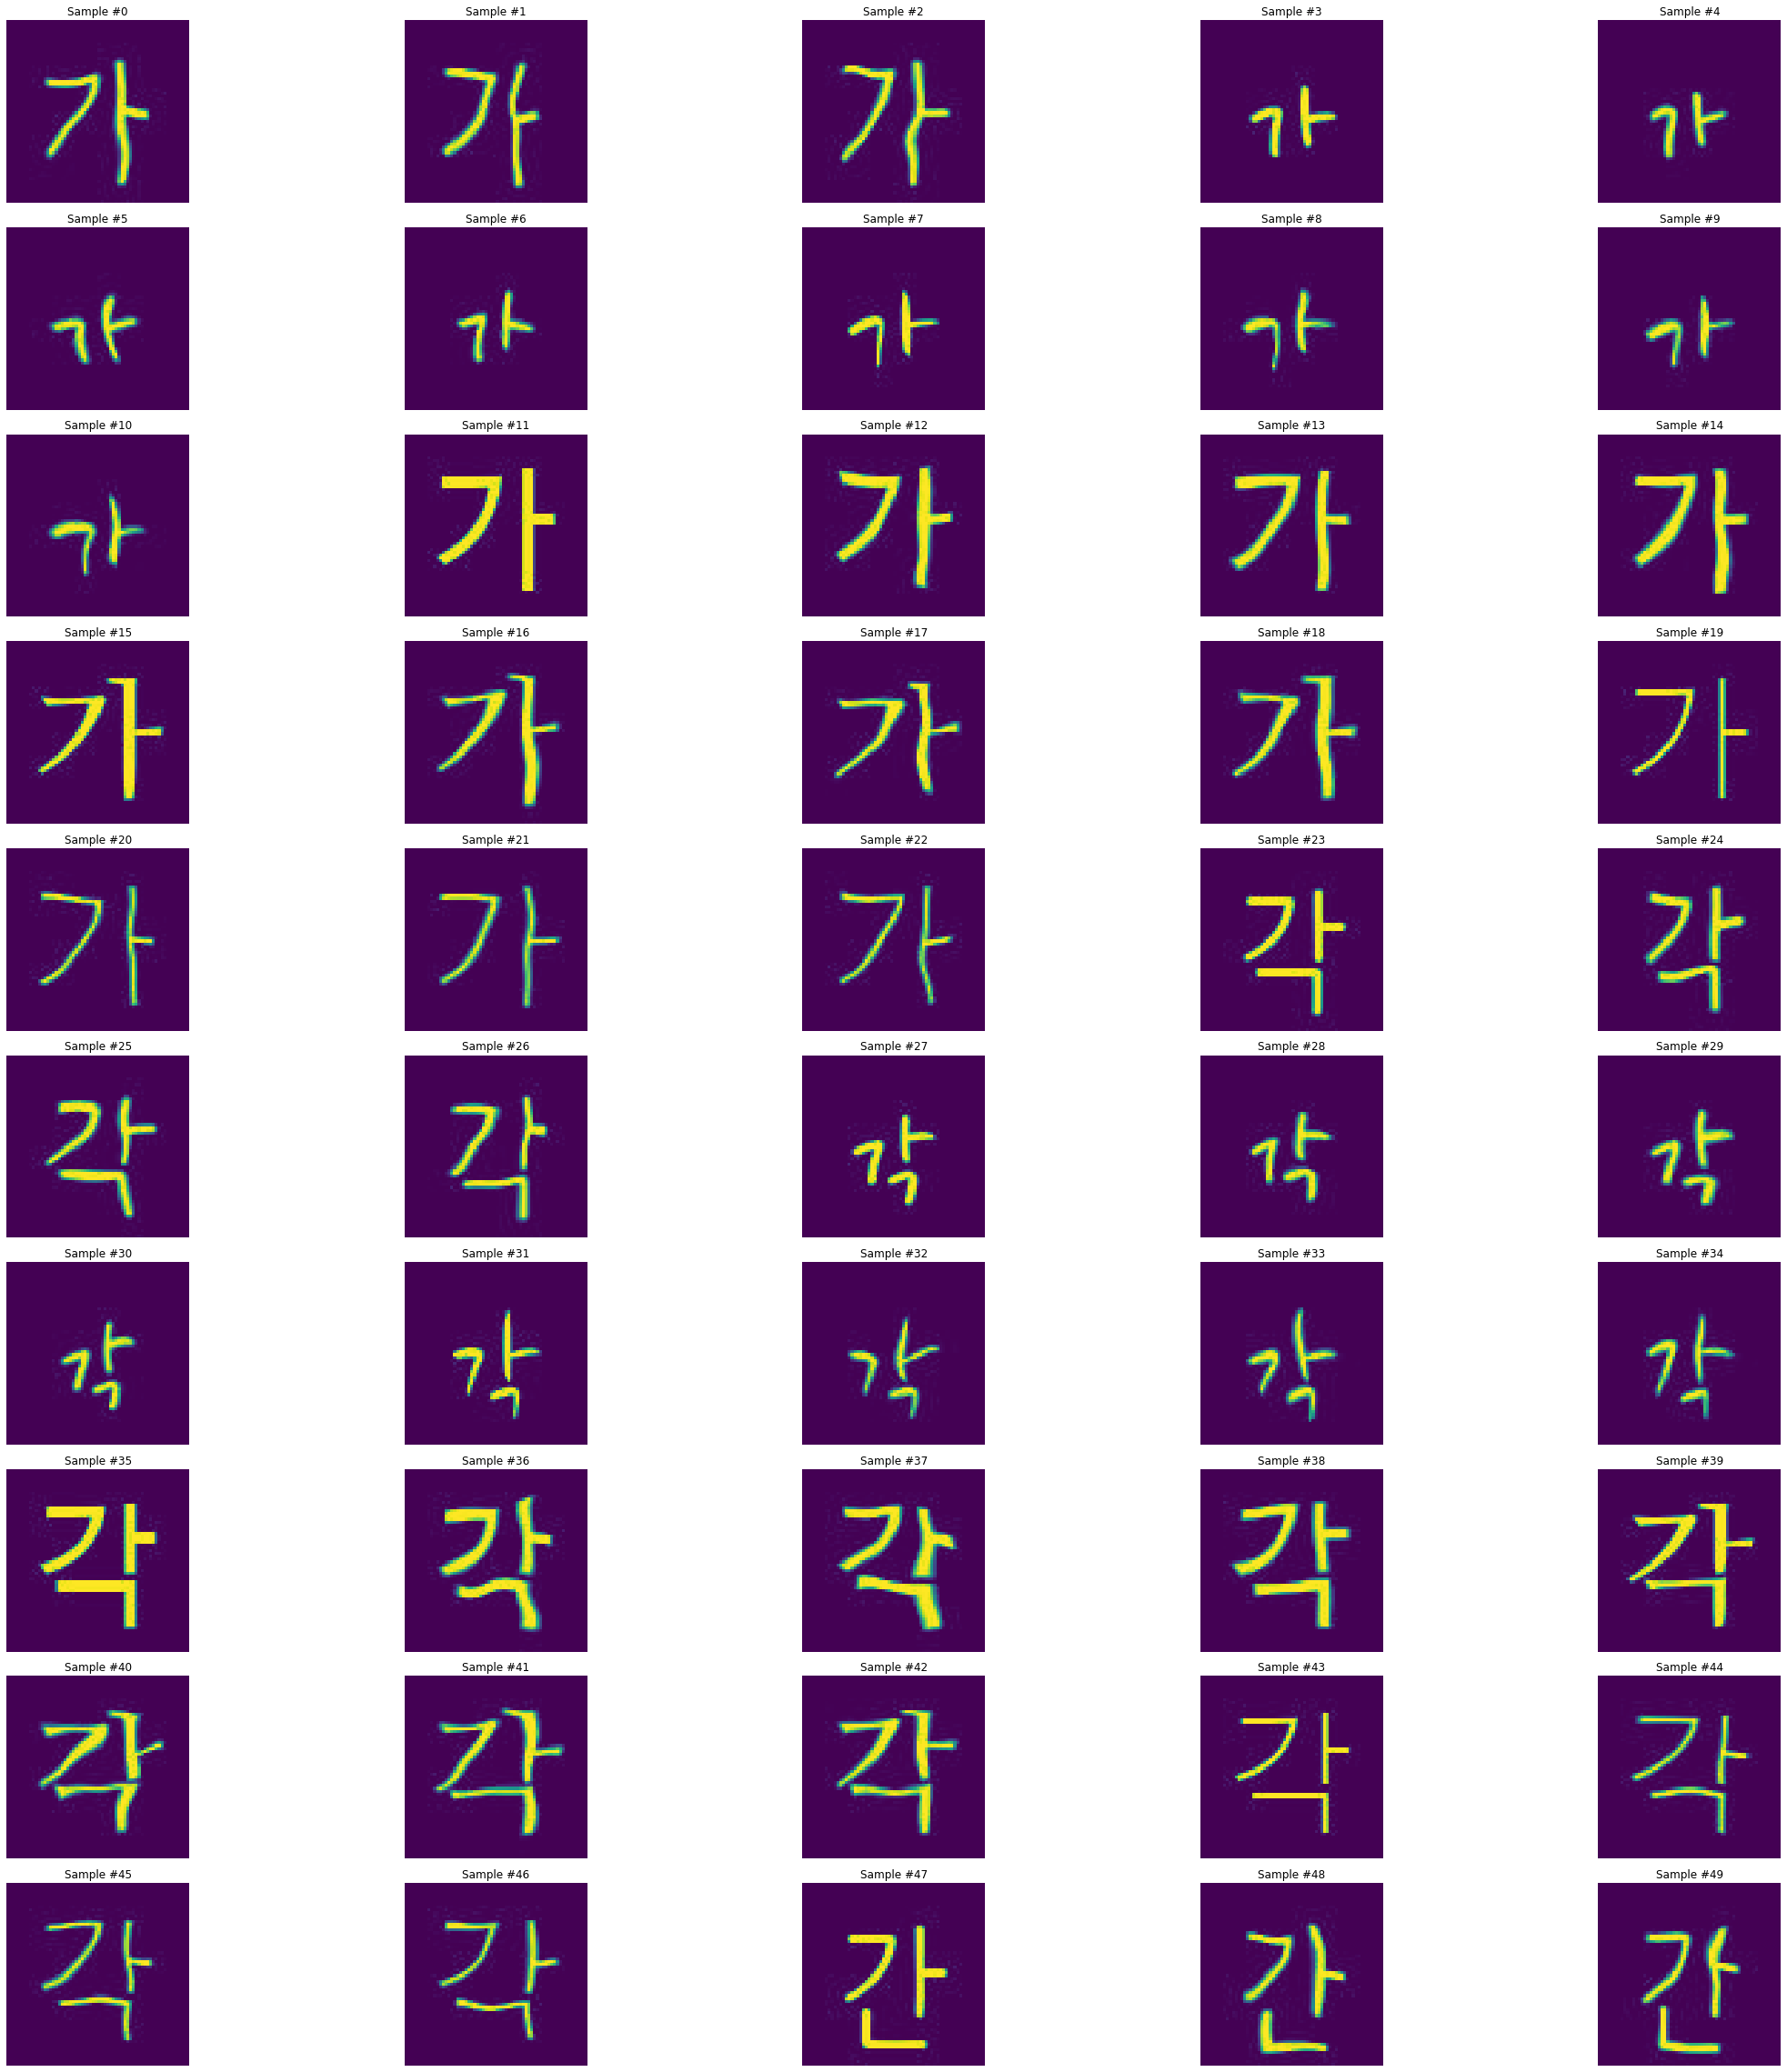

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 32))
for i in range(50):
    sample = korean_dataset[i]
    ax = plt.subplot(10, 5, i + 1)
    plt.tight_layout()
    plt.imshow(sample['image'])
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    pass
plt.show()

In [7]:
from torchvision import transforms
batch_size=64
learning_rate=0.0002
num_epoch=10

korean_dataset = KoreanHandwritingDataset(
    csv_file,root_dir, transform=transforms.Compose([ToTensor()]))
dataloader = DataLoader(korean_dataset,
                          batch_size = batch_size,
                          shuffle = False,
                          num_workers = 0)

In [8]:
for i in range(len(korean_dataset)):
    sample = korean_dataset[i]
    print(i, sample['image'].type(), sample['label'].size())

    if i == 30:
        break

0 torch.DoubleTensor torch.Size([24])
1 torch.DoubleTensor torch.Size([24])
2 torch.DoubleTensor torch.Size([24])
3 torch.DoubleTensor torch.Size([24])
4 torch.DoubleTensor torch.Size([24])
5 torch.DoubleTensor torch.Size([24])
6 torch.DoubleTensor torch.Size([24])
7 torch.DoubleTensor torch.Size([24])
8 torch.DoubleTensor torch.Size([24])
9 torch.DoubleTensor torch.Size([24])
10 torch.DoubleTensor torch.Size([24])
11 torch.DoubleTensor torch.Size([24])
12 torch.DoubleTensor torch.Size([24])
13 torch.DoubleTensor torch.Size([24])
14 torch.DoubleTensor torch.Size([24])
15 torch.DoubleTensor torch.Size([24])
16 torch.DoubleTensor torch.Size([24])
17 torch.DoubleTensor torch.Size([24])
18 torch.DoubleTensor torch.Size([24])
19 torch.DoubleTensor torch.Size([24])
20 torch.DoubleTensor torch.Size([24])
21 torch.DoubleTensor torch.Size([24])
22 torch.DoubleTensor torch.Size([24])
23 torch.DoubleTensor torch.Size([24])
24 torch.DoubleTensor torch.Size([24])
25 torch.DoubleTensor torch.Size([2

In [9]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                      out_channels=16,
                      kernel_size=5,
                      stride=1,
                      padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2,2) # kernel size 2x2 (32 = 64/2)
        
        self.conv2 = nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=5,
                      stride=1,
                      padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2) # kernel size 2x2 (16 = 32/2)
        
        self.conv3 = nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=5,
                      stride=1,
                      padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(2,2) # kernel size 2x2 (8 = 16/2)
        
        self.linear1 = nn.Linear(6*6*64,576)
        self.relu4 = nn.ReLU()
        
        self.linear2 = nn.Linear(576,128)
        self.relu5 = nn.ReLU()
        
        self.linear3 = nn.Linear(128,24)
        self.relu6 = nn.ReLU()
        pass
    def forward(self,x):
        out = self.conv1(x)
        #print(out.shape)
        out = self.relu1(out)
        #print(out.shape)
        out = self.maxpool1(out)
        #print(out.shape)
        out = self.conv2(out)
        #print(out.shape)
        out = self.relu2(out)
        #print(out.shape)
        out = self.maxpool2(out)
        #print(out.shape)
        out = self.conv3(out)
        #print(out.shape)
        out = self.relu3(out)
        #print(out.shape)
        out = self.maxpool3(out)
        #print(out.shape)
        out = out.view(batch_size,-1)
        #print(out.shape)
        out = self.linear1(out)
        #print(out.shape)
        out = self.relu4(out)
        #print(out.shape)
        out = self.linear2(out)
        #print(out.shape)
        out = self.relu5(out)
        #print(out.shape)
        out = self.linear3(out)
        #print(out.shape)
        out = self.relu5(out)
        #print(out.shape)
        return out

[What is BCEWithLogitsLoss?](https://discuss.pytorch.org/t/multi-label-classification-in-pytorch/905/45)

In [10]:
import torch.optim as optim
model=CNN().double()
loss_function=nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
loss_arr=[]
for i in range(num_epoch):
    for j, sample in enumerate(dataloader):
        x = sample['image']
        y = sample['label']
        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_function(output,y)
        loss.backward()
        optimizer.step()
        if j% 10 == 0:
            print(loss)
            loss_arr.append(loss.detach().numpy())

tensor(0.6921, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6358, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5161, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5199, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.1677, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6016, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5762, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5974, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5432, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5569, grad_fn=<BinaryCrossEntropyWithLogitsBac

## test

In [ ]:
with torch.no_grad():
    for j, sample in enumerate(dataloader):
        x = sample['image']
        y = sample['label']
        
        output = model.forward(x)
        for i in range(len(output)):
            print("실제 값: ",
                  decode_from_bin(output[i].tolist()),
                  ", 출력 값: ",
                  decode_from_bin(y[i].tolist()))